In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/Amazon Sale Report.csv')

In [3]:
data.info()
print("-"* 30)
print("\n")
display(data.describe())
print("-"* 30)
print("\n")
display(data.shape)
print("-"* 30)
print("\n")
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


------------------------------




(128976, 21)

------------------------------




,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
# Fix data types
data['Amount'] = data['Amount'].astype(float)
data['Qty'] = data['Qty'].astype(int)
data['Date'] = pd.to_datetime(data['Date'], format='%m-%d-%y', errors='coerce')

In [5]:
data.dtypes

,0
index,int64
Order ID,object
Date,datetime64[ns]
Status,object
Fulfilment,object
Sales Channel,object
ship-service-level,object
Category,object
Size,object
Courier Status,object


In [6]:
# Drop columns 'New' and 'PendingS' as they have all missing values
data.drop(columns=['New', 'PendingS'], inplace=True)

In [7]:
# Count duplicate rows
duplicates_count = data.duplicated().sum()
print(f"Total duplicate rows: {duplicates_count}")

data.drop_duplicates(inplace=True)
# Count duplicate rows
duplicates_count = data.duplicated().sum()
print(f"Total duplicate rows: {duplicates_count}")

Total duplicate rows: 168
Total duplicate rows: 0


In [8]:
data.shape

(128808, 19)

In [9]:
print("\n🔹 Summary Statistics (Numerical Columns):\n")
display(data.describe())


🔹 Summary Statistics (Numerical Columns):



,index,Date,Qty,Amount,ship-postal-code
count,128808.000000,73699,128808.000000,121019.000000,128775.00000
mean,64564.582906,2022-05-17 11:11:46.088278272,0.904416,648.631921,463957.07107
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.00000
25%,32368.750000,2022-04-23 00:00:00,1.000000,449.000000,382421.00000
50%,64570.500000,2022-05-18 00:00:00,1.000000,605.000000,500033.00000
75%,96772.250000,2022-06-14 00:00:00,1.000000,788.000000,600024.00000
max,128974.000000,2022-06-29 00:00:00,15.000000,5584.000000,989898.00000
std,37193.614079,NaN,0.313373,281.224583,191478.52940


In [10]:
print("\n🔹 Summary Statistics (Categorical Columns):\n")
display(data.describe(include='object'))


🔹 Summary Statistics (Categorical Columns):



,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,128808,128808,128808,128808,128808,128808,128808,128808,121019,128775,128775,128775,39213
unique,120229,13,2,2,2,9,11,4,1,8948,69,1,1
top,171-5057375-2831560,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,77713,89595,128684,88513,50219,22350,109341,121019,11191,22234,128775,39213


In [11]:
# Separate numerical and categorical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

print("🔹 Numerical Columns:")
print(num_cols.tolist())
print("\n🔹 Categorical Columns:")
print(cat_cols.tolist())

# Missing values in numerical columns
print("\n📊 Missing Values in Numerical Columns:\n")
missing_num = data[num_cols].isnull().sum().sort_values(ascending=False)
missing_num = missing_num[missing_num > 0]
display(pd.DataFrame({
    'Missing Count': missing_num,
    'Missing %': (missing_num / len(data)) * 100
}))

# Missing values in categorical columns
print("\n📊 Missing Values in Categorical Columns:\n")
missing_cat = data[cat_cols].isnull().sum().sort_values(ascending=False)
missing_cat = missing_cat[missing_cat > 0]
display(pd.DataFrame({
    'Missing Count': missing_cat,
    'Missing %': (missing_cat / len(data)) * 100
}))

🔹 Numerical Columns:
['index', 'Qty', 'Amount', 'ship-postal-code']

🔹 Categorical Columns:
['Order ID', 'Status', 'Fulfilment', 'Sales Channel', 'ship-service-level', 'Category', 'Size', 'Courier Status', 'currency', 'ship-city', 'ship-state', 'ship-country', 'fulfilled-by']

📊 Missing Values in Numerical Columns:



,Missing Count,Missing %
Amount,7789,6.046985
ship-postal-code,33,0.025620



📊 Missing Values in Categorical Columns:



,Missing Count,Missing %
fulfilled-by,89595,69.557015
currency,7789,6.046985
ship-city,33,0.025620
ship-state,33,0.025620
ship-country,33,0.025620


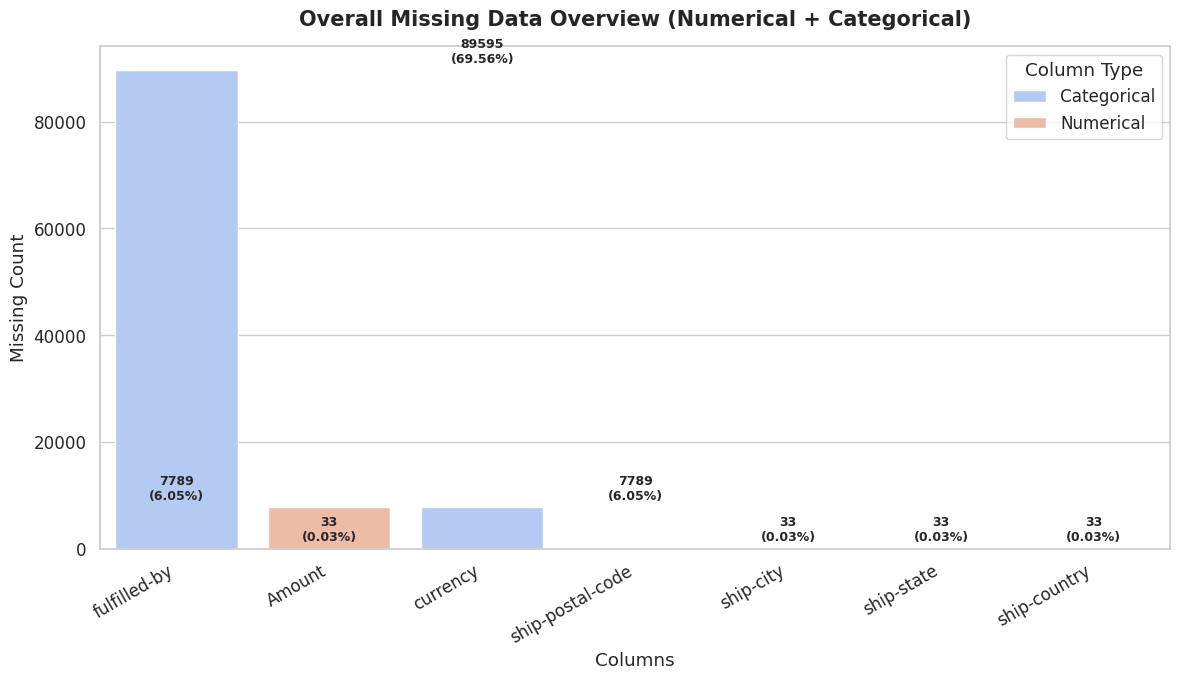

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create combined missing data summary

missing_data = pd.DataFrame({
    'Column': ['Amount', 'ship-postal-code', 'fulfilled-by', 'currency', 'ship-city', 'ship-state', 'ship-country'],
    'Missing Count': [7789, 33, 89595, 7789, 33, 33, 33],
    'Missing %': [6.046985, 0.025620, 69.557015, 6.046985, 0.025620, 0.025620, 0.025620],
    'Type': ['Numerical', 'Numerical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical']
})

# Sort by Missing Count (descending)
missing_data = missing_data.sort_values(by='Missing Count', ascending=False)

# Set visual style
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(12, 7))

# Create Bar Plot
sns.barplot(
    data=missing_data,
    x='Column',
    y='Missing Count',
    hue='Type',
    palette='coolwarm'
)

# Add annotations
for index, row in missing_data.iterrows():
    plt.text(
        index,
        row['Missing Count'] + 0.01 * max(missing_data['Missing Count']),
        f"{int(row['Missing Count'])}\n({row['Missing %']:.2f}%)",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

# Chart Labels & Formatting
plt.title('Overall Missing Data Overview (Numerical + Categorical)', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Columns')
plt.ylabel('Missing Count')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Column Type', loc='upper right')
plt.tight_layout()
plt.show()


In [15]:
# View top 5 most frequent values in each column (for better understanding)
for col in data.columns:
    print(f"\nColumn: {col}")
    print(data[col].value_counts(dropna=False).head(5))


Column: index
index
128974    1
0         1
1         1
2         1
3         1
Name: count, dtype: int64

Column: Order ID
Order ID
171-5057375-2831560    12
403-4984515-8861958    12
403-0173977-3041148    11
404-9932919-6662730    11
408-3317403-1729937    10
Name: count, dtype: int64

Column: Date
Date
NaT           55109
2022-04-14     1883
2022-04-15     1853
2022-04-20     1850
2022-04-23     1816
Name: count, dtype: int64

Column: Status
Status
Shipped                         77713
Shipped - Delivered to Buyer    28715
Cancelled                       18311
Shipped - Returned to Seller     1952
Shipped - Picked Up               973
Name: count, dtype: int64

Column: Fulfilment
Fulfilment
Amazon      89595
Merchant    39213
Name: count, dtype: int64

Column: Sales Channel
Sales Channel
Amazon.in     128684
Non-Amazon       124
Name: count, dtype: int64

Column: ship-service-level
ship-service-level
Expedited    88513
Standard     40295
Name: count, dtype: int64

Column: Category

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


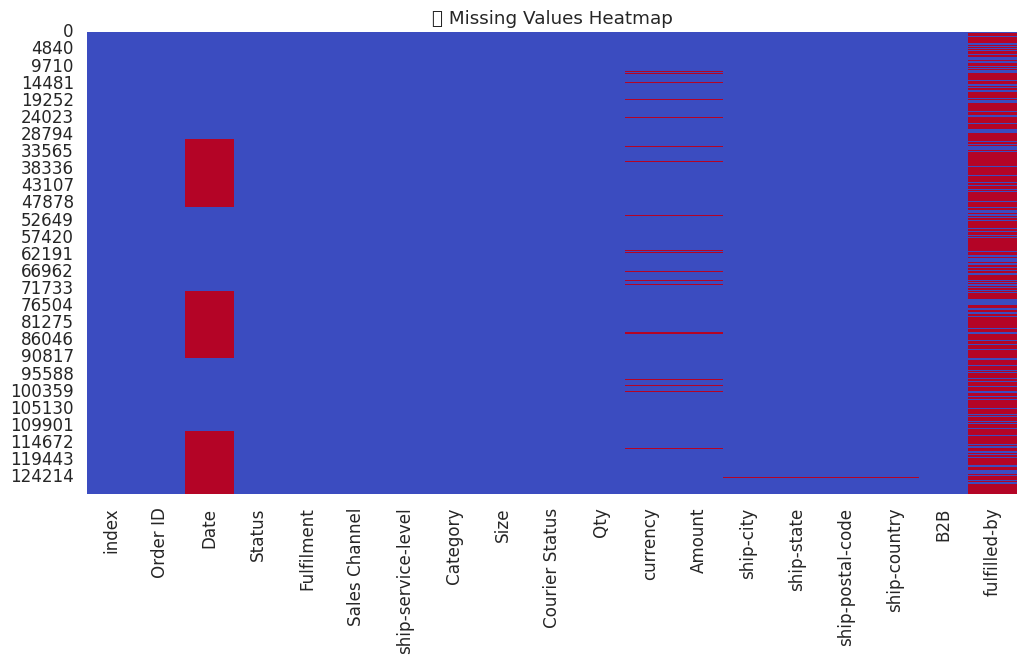

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False, cmap='coolwarm')
plt.title("🔍 Missing Values Heatmap")
plt.show()


🔹 Correlation Matrix (Numerical Columns Only):



,index,Qty,Amount,ship-postal-code,B2B
index,1.000000,0.010726,0.047283,0.003801,-0.006332
Qty,0.010726,1.000000,0.066792,-0.010258,0.015796
Amount,0.047283,0.066792,1.000000,-0.038315,0.015694
ship-postal-code,0.003801,-0.010258,-0.038315,1.000000,-0.035667
B2B,-0.006332,0.015796,0.015694,-0.035667,1.000000


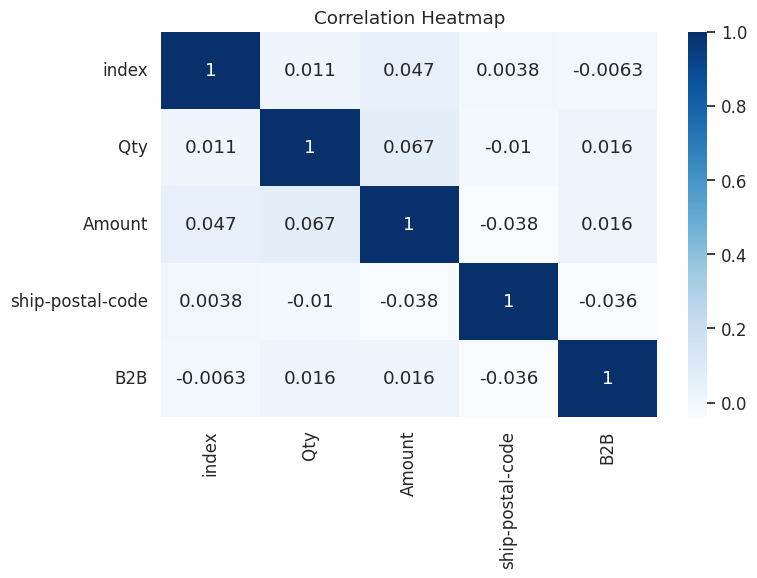

In [17]:
print("\n🔹 Correlation Matrix (Numerical Columns Only):\n")
corr = data.corr(numeric_only=True)
display(corr)

# Visualize it
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

In [18]:
# Drop rows where 'Amount' is missing (only 6%)
data = data.dropna(subset=['Amount']).copy()

# Fill missing categorical columns with mode
categorical_cols = ['currency', 'ship-state', 'ship-city', 'ship-country']
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Fill missing postal codes with forward fill or mode
data['ship-postal-code'] = data['ship-postal-code'].ffill()

# Drop 'fulfilled-by' column as it has a high percentage of missing values
data.drop(columns=['fulfilled-by'], inplace=True)

# Verify
print("✅ Missing Values After Cleaning:\n")
print(data.isnull().sum())

✅ Missing Values After Cleaning:

index                     0
Order ID                  0
Date                  51760
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
B2B                       0
dtype: int64


In [19]:
# Step 1: Extract date components
data['Month'] = data['Date'].dt.month_name()
data['Year'] = data['Date'].dt.year

# Step 2: Verify new columns
data[['Date', 'Month', 'Year']].head()

,Date,Month,Year
0,2022-04-30,April,2022.0
1,2022-04-30,April,2022.0
2,2022-04-30,April,2022.0
3,2022-04-30,April,2022.0
4,2022-04-30,April,2022.0


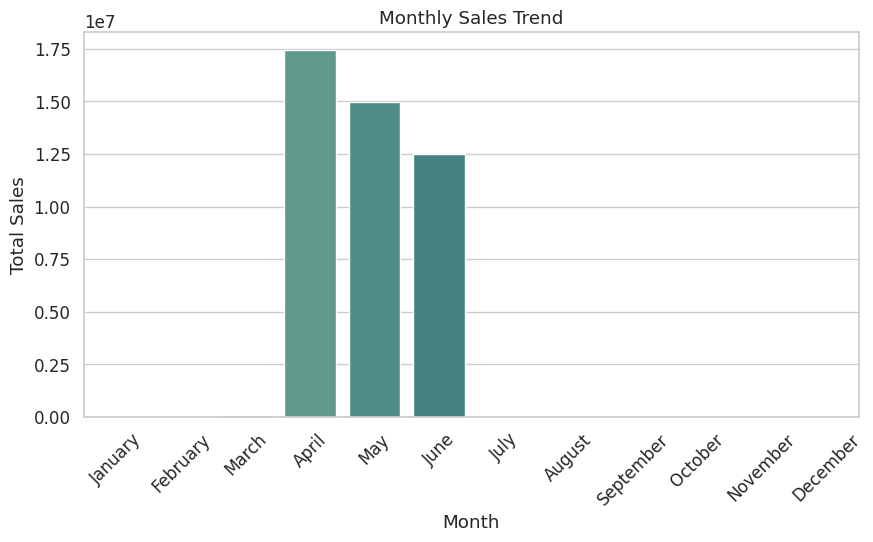

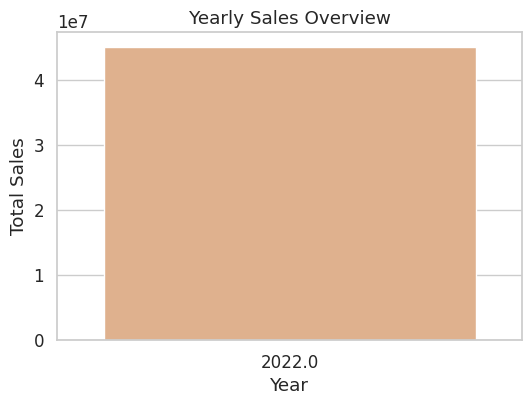

In [20]:
# Total Sales per Month
monthly_sales = data.groupby('Month')['Amount'].sum().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="crest", hue=monthly_sales.index, legend=False)
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.show()

# Total Sales per Year
yearly_sales = data.groupby('Year')['Amount'].sum()

plt.figure(figsize=(6,4))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette="flare", hue=yearly_sales.index, legend=False)
plt.title("Yearly Sales Overview")
plt.ylabel("Total Sales")
plt.show()

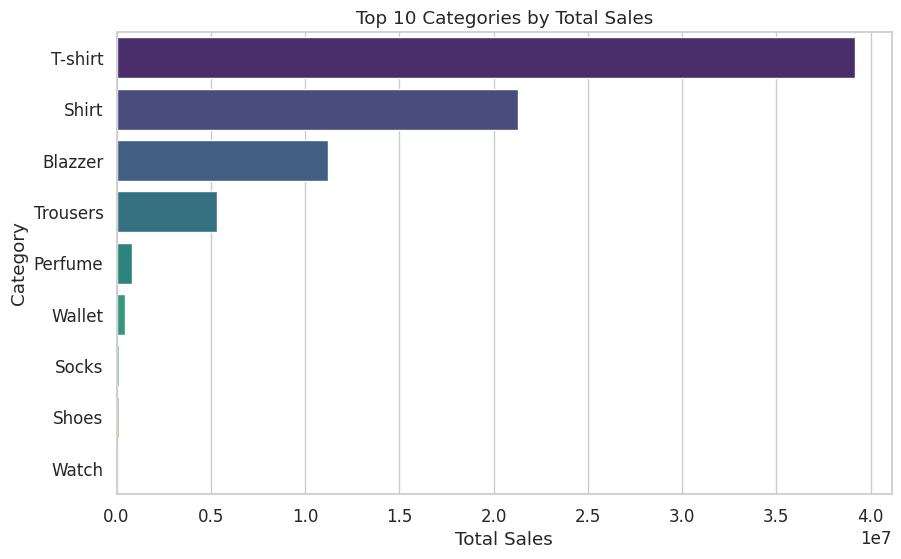

In [21]:
# Top 10 categories by total sales
top_categories = data.groupby('Category')['Amount'].sum().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis", hue=top_categories.index, legend=False)
plt.title("Top 10 Categories by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.show()

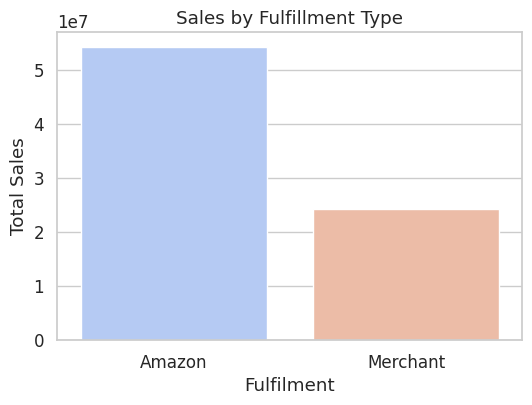

In [22]:
fulfillment_sales = data.groupby('Fulfilment')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=fulfillment_sales.index, y=fulfillment_sales.values, palette="coolwarm", hue=fulfillment_sales.index, legend=False)
plt.title("Sales by Fulfillment Type")
plt.ylabel("Total Sales")
plt.show()

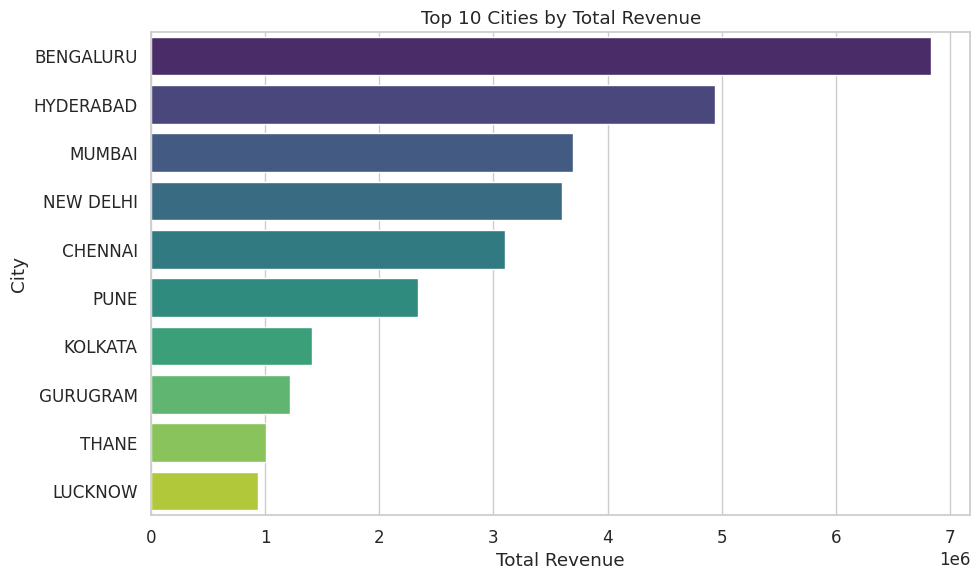

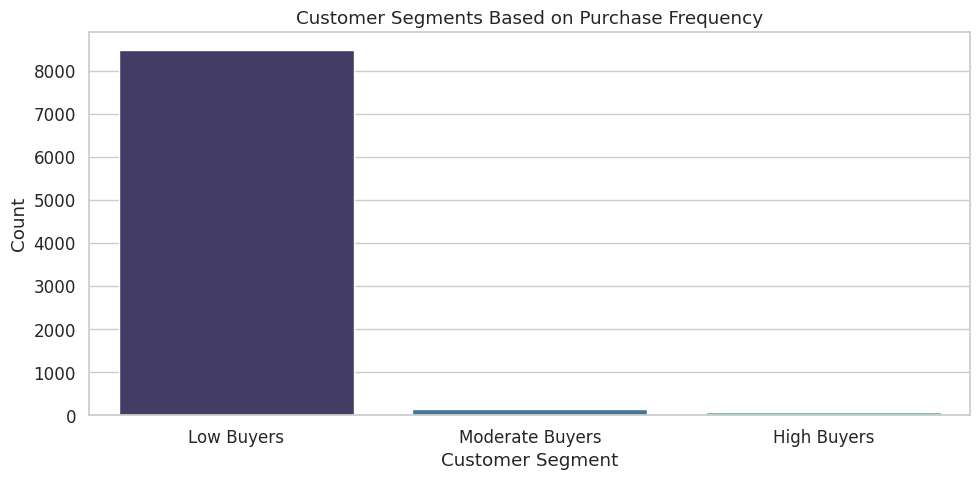

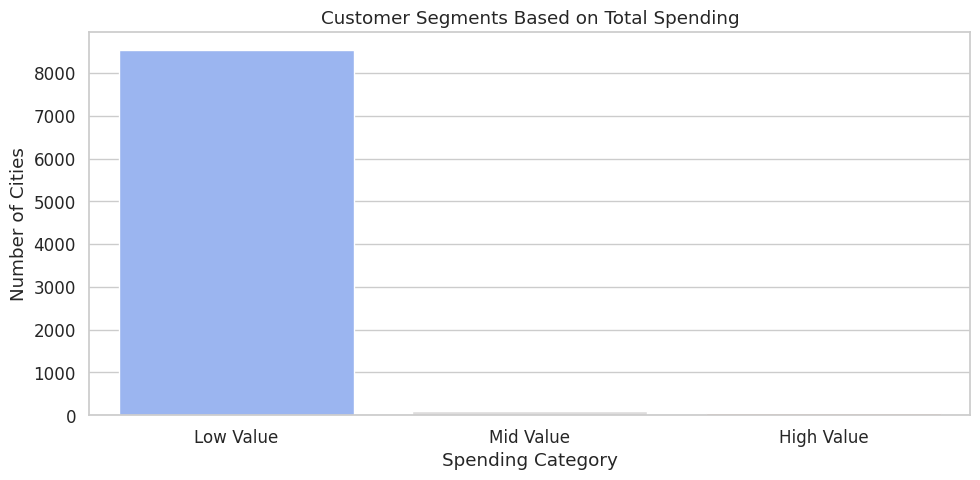


--------------------📋 CUSTOMER SEGMENTATION SUMMARY (Top 10)--------------------



,ship-state,ship-city,Amount,Total_Orders,Avg_Order_Value,Total_Spent,Spend_Category,Segment
0,ANDAMAN & NICOBAR,Andaman and nicobar islands port Blair,999.000000,1,999.000000,999.000000,Low Value,Low Buyers
1,ANDAMAN & NICOBAR,BAMBOOFLAT,7208.240000,10,720.824000,7208.240000,Low Value,Low Buyers
2,ANDAMAN & NICOBAR,FERRARGUNJ,5714.000000,9,634.888889,5714.000000,Low Value,Low Buyers
3,ANDAMAN & NICOBAR,GARACHARMA,307.000000,1,307.000000,307.000000,Low Value,Low Buyers
4,ANDAMAN & NICOBAR,GREAT NICOBAR,1973.000000,3,657.666667,1973.000000,Low Value,Low Buyers
5,ANDAMAN & NICOBAR,Garacharma,1111.000000,2,555.500000,1111.000000,Low Value,Low Buyers
6,ANDAMAN & NICOBAR,Goalghar port blair,399.000000,1,399.000000,399.000000,Low Value,Low Buyers
7,ANDAMAN & NICOBAR,Haddo,2461.000000,3,820.333333,2461.000000,Low Value,Low Buyers
8,ANDAMAN & NICOBAR,Havelock,844.000000,2,422.000000,844.000000,Low Value,Low Buyers
9,ANDAMAN & NICOBAR,JUNGLIGHAT,399.000000,1,399.000000,399.000000,Low Value,Low Buyers


In [23]:
# 💠 CUSTOMER SEGMENTATION ANALYSIS

# Check available customer identifier columns
data.columns

# 1️⃣ Group customers based on location (State & City)
customer_location = data.groupby(['ship-state', 'ship-city']).agg({
    'Amount': 'sum',
    'Order ID': 'count'
}).reset_index().rename(columns={'Order ID': 'Total_Orders'})

# Calculate average order value per city
customer_location['Avg_Order_Value'] = customer_location['Amount'] / customer_location['Total_Orders']

# Top 10 high-value cities
top_cities = customer_location.sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Amount', y='ship-city', hue='ship-city', data=top_cities, palette='viridis', legend=False)
plt.title('Top 10 Cities by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('City')
plt.tight_layout()
plt.show()


# 2️⃣ Behavior-based segmentation (New vs Repeat Customers)
customer_orders = data.groupby('ship-city')['Order ID'].nunique().reset_index(name='Total_Orders')

# Simulate repeat behavior (proxy for city-level customer concentration)
repeat_customers = data.groupby('ship-city')['Order ID'].count().reset_index(name='Order_Frequency')
repeat_customers['Segment'] = pd.cut(
    repeat_customers['Order_Frequency'],
    bins=[0, 50, 200, float('inf')],
    labels=['Low Buyers', 'Moderate Buyers', 'High Buyers']
)

plt.figure(figsize=(10,5))
sns.countplot(x='Segment', data=repeat_customers, hue='Segment', palette='mako', legend=False)
plt.title('Customer Segments Based on Purchase Frequency')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# 3️⃣ Total Spend Segmentation (Monetary Value)
spend_segment = data.groupby('ship-city')['Amount'].sum().reset_index(name='Total_Spent')
spend_segment['Spend_Category'] = pd.cut(
    spend_segment['Total_Spent'],
    bins=[0, 50000, 200000, float('inf')],
    labels=['Low Value', 'Mid Value', 'High Value']
)

plt.figure(figsize=(10,5))
sns.countplot(x='Spend_Category', data=spend_segment, hue='Spend_Category', palette='coolwarm', legend=False)
plt.title('Customer Segments Based on Total Spending')
plt.xlabel('Spending Category')
plt.ylabel('Number of Cities')
plt.tight_layout()
plt.show()


# 4️⃣ Combine insights into a single summary table
customer_segmentation_summary = (
    customer_location
    .merge(spend_segment, on='ship-city', how='left')
    .merge(repeat_customers[['ship-city', 'Segment']], on='ship-city', how='left')
)

# Add spacing and style for better display
print("\n" + "📋 CUSTOMER SEGMENTATION SUMMARY (Top 10)".center(80, "-") + "\n")
display(customer_segmentation_summary.head(10).style.background_gradient(cmap='Blues').set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#1f77b4'), ('color', 'white')]}]
))


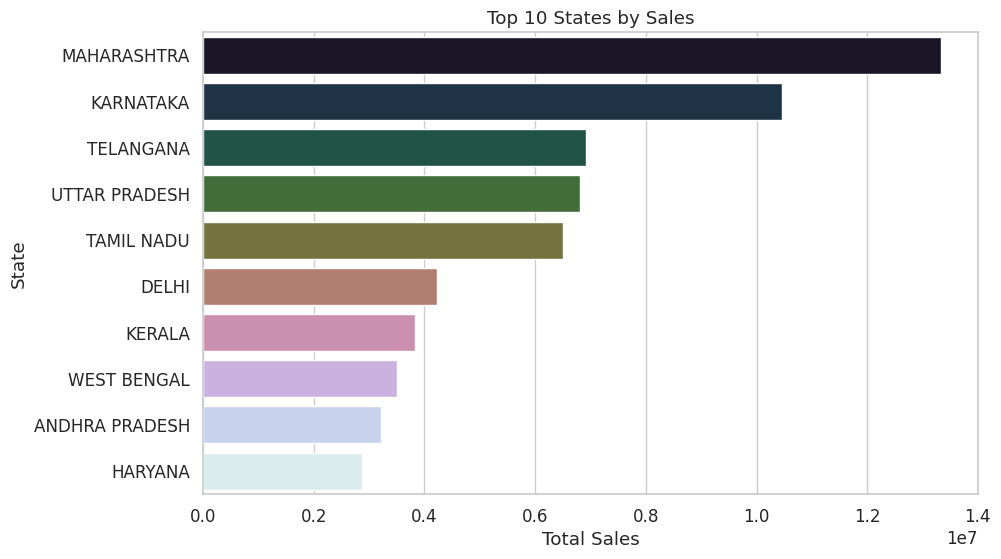

In [24]:
# Sales by State
state_sales = data.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=state_sales.values, y=state_sales.index, palette="cubehelix", hue=state_sales.index, legend=False)
plt.title("Top 10 States by Sales")
plt.xlabel("Total Sales")
plt.ylabel("State")
plt.show()

In [25]:
# Business Insights & Recommendations

# 1️⃣ Key Metrics
total_sales = data['Amount'].sum()
avg_sales = data['Amount'].mean()
top_category = data.groupby('Category')['Amount'].sum().idxmax()
top_state = data.groupby('ship-state')['Amount'].sum().idxmax()
top_city = data.groupby('ship-city')['Amount'].sum().idxmax()
top_fulfillment = data.groupby('Fulfilment')['Amount'].sum().idxmax()

print("📊 BUSINESS INSIGHTS SUMMARY")
print("--------------------------------------------")
print(f"🧾 Total Sales: ₹{total_sales:,.0f}")
print(f"💰 Average Transaction Value: ₹{avg_sales:,.2f}")
print(f"👕 Top Performing Product Category: {top_category}")
print(f"📍 Highest Revenue State: {top_state}")
print(f"🏙️ Highest Spending City: {top_city}")
print(f"🚚 Most Effective Fulfillment Type: {top_fulfillment}")
print("\n" + "📈 BUSINESS RECOMMENDATIONS".center(60, "-"))

# 2️⃣ Recommendations Summary
recommendations = """
📈 Business Recommendations:
1. Focus marketing and stock availability on top-performing categories like T-shirts and Shirts.
2. Enhance logistics efficiency for high-demand states such as Maharashtra and Karnataka.
3. Use Amazon fulfillment more for peak season months (April–June) as it shows higher reliability and volume.
4. Improve merchant fulfillment performance through better delivery tracking and customer service.
5. Expand targeted promotions in Bengaluru and Hyderabad — key high-spending urban markets.
6. Leverage off-season months (July–December) by introducing discount campaigns and festive offers.
7. Introduce bundle offers on mid-performing categories like Blazers and Trousers to boost conversion.
"""
print(recommendations)

📊 BUSINESS INSIGHTS SUMMARY
--------------------------------------------
🧾 Total Sales: ₹78,496,786
💰 Average Transaction Value: ₹648.63
👕 Top Performing Product Category: T-shirt
📍 Highest Revenue State: MAHARASHTRA
🏙️ Highest Spending City: BENGALURU
🚚 Most Effective Fulfillment Type: Amazon

-----------------📈 BUSINESS RECOMMENDATIONS-----------------

📈 Business Recommendations:
1. Focus marketing and stock availability on top-performing categories like T-shirts and Shirts.
2. Enhance logistics efficiency for high-demand states such as Maharashtra and Karnataka.
3. Use Amazon fulfillment more for peak season months (April–June) as it shows higher reliability and volume.
4. Improve merchant fulfillment performance through better delivery tracking and customer service.
5. Expand targeted promotions in Bengaluru and Hyderabad — key high-spending urban markets.
6. Leverage off-season months (July–December) by introducing discount campaigns and festive offers.
7. Introduce bundle offers